In [1]:
from importlib import reload
import flymovie as fm
import cnn_models.siamese_cnn as cn
import cnn_models.evaluate_models as ev
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sklearn
import tempfile
import pickle
import tensorflow as tf
import umap
from importlib import reload
from sklearn.manifold import TSNE
import scipy.ndimage as ndi
import skimage as ski
%load_ext autoreload
%autoreload 2

In [121]:
em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-cterm-stretchpsf_gqBgafnA_mix_real_sim_3_34layer.pkl') 
#em_s, files_s = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-cterm-blackbox1_GlxqIxOJ_mix_real_sim_3_34layer.pkl') 
em_r, files_r = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zldcterm-nc14-real-202200501_mix_real_sim_3_34layer.pkl') 

In [123]:
def dists_arr_to_row(arr, row):
    dists_sq = np.sum((arr - row) ** 2, axis=1)
    dists = np.sqrt(dists_sq)
    return dists

def find_in_radius(em1, files1, em2, files2, r):
    good_files = []
    for i in range(len(files1)):
        if i % 250 == 0:
            print(i)

        dists = dists_arr_to_row(em2, em1[i])
        good_uns = dists <= r
        #good_files1 = np.array(files1)[good_uns]
        good_files_this = list(np.array(files2)[good_uns])
        good_files = good_files + good_files_this

    return np.unique(good_files)

def d_pairwise_all(em1, em2):
    d = []
    for i in range(len(em2)):
        d_ = list(dists_arr_to_row(em1, em2[i]))
        d = d + d_
    return d


In [127]:
find_in_radius(em_r, files_r, em_s, files_s, r=0.7)

0


array(['Avk_2051.02_9.57_1_1_1_0.0_1_0.1_7.28_rep0.pkl',
       'DSi_1893.74_13.85_1_1_1_0.0_1_0.1_7.79_rep0.pkl',
       'FAU_2292.21_9.16_1_1_1_0.0_1_0.1_8.83_rep0.pkl',
       'Gvv_1901.8_13.75_1_1_1_0.0_1_0.1_8.26_rep0.pkl',
       'IbF_2440.14_10.78_1_1_1_0.0_1_0.1_8.92_rep0.pkl',
       'LqJ_2050.46_8.8_1_1_1_0.0_1_0.1_7.53_rep0.pkl',
       'MUb_2165.81_9.78_1_1_1_0.0_1_0.1_8.82_rep1.pkl',
       'NNB_2240.08_13.3_1_1_1_0.0_1_0.1_9.35_rep0.pkl',
       'NtK_1915.63_12.09_1_1_1_0.0_1_0.1_8.16_rep0.pkl',
       'PcE_2468.66_8.3_1_1_1_0.0_1_0.1_7.9_rep0.pkl',
       'QjG_2390.69_8.8_1_1_1_0.0_1_0.1_9.31_rep0.pkl',
       'RyD_1979.24_11.0_1_1_1_0.0_1_0.1_8.25_rep0.pkl',
       'SXX_2418.07_12.06_1_1_1_0.0_1_0.1_8.59_rep0.pkl',
       'TDk_2126.66_9.69_1_1_1_0.0_1_0.1_8.45_rep0.pkl',
       'VHL_2410.35_9.02_1_1_1_0.0_1_0.1_8.55_rep0.pkl',
       'ZQY_1741.48_11.16_1_1_1_0.0_1_0.1_6.98_rep0.pkl',
       'ZrM_2535.68_13.68_1_1_1_0.0_1_0.1_9.26_rep0.pkl',
       'aeg_1931.11_8.96_1_1_

In [39]:
np.mean([10.2,10.2,10.79,11.29,9.94,10.22,10.47,10.66,10.49,10.55,9.45,9.01,11.02])

10.330000000000002

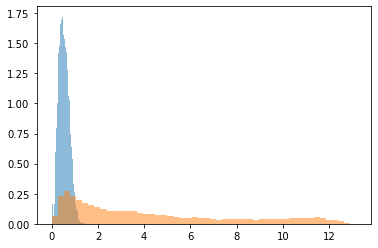

In [126]:
plt.hist(d_pairwise_all(em_r, em_r), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_s, em_s), bins=50, alpha=0.5, density=True);

In [35]:
mask = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_masks/zld-cterm/20220321-zld-cterm-em1-01_2.pkl')
sim = Sim(mask)
sim.conc_to_nmolecules(80)

4809.952710376001

In [40]:
em_w, files_w = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zld-wt-early13_mix_real_sim_3_34layer.pkl') 
em_m, files_m = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings-zldmut_early13_mix_real_sim_3_34layer.pkl') 

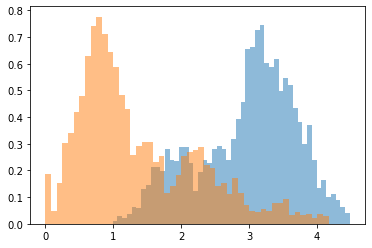

In [56]:
plt.hist(d_pairwise_all(em_w, em_m), bins=50, alpha=0.5, density=True);
plt.hist(d_pairwise_all(em_w, em_w), bins=50, alpha=0.5, density=True);

In [66]:
im = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/zld/zld-real_20220318-zld-mneon-em1-09_4_3.pkl')
fm.viewer(im, 5)

interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'Greens', 'cividis', 'Reds', '…

In [63]:
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220210_21x25x25pixels_100x50x50voxel.pkl')
outfolder = '/Users/michaelstadler/Desktop/temp'
nreps = 1
concentration = 80
hlb_diam_rng = [12,12]
hlb_nmols_rng = [1,1]
n_clusters_rng = [60,60]
cluster_diam_mean_rng = [1,1] 
cluster_diam_var_rng = [0.01,0.01]
cluster_nmols_mean_rng = [6,6]
cluster_nmols_var_rng = [1,1]
noise_sigma_rng = [10.2, 10.2]
dims_init=(85, 85, 85)
dims_kernel=(100,50,50)
dims_final=(250,85,85)
gfp_intensity = 2.7

#hlb_coords = [hlb_possible_coords[x] for x in np.random.choice(len(hlb_possible_coords), 2)]
hlb_coords = [(12, 60, 38), (51, 57, 41)]
sims = []
nsims=1
for _ in range(nsims):
    masks = masks_src[np.random.choice(np.arange(masks_src.shape[0]), nsims)]
    sim = fm.sim_rpb1(masks, kernel, outfolder, nreps, concentration, hlb_diam_rng, 
        hlb_nmols_rng, n_clusters_rng, cluster_diam_mean_rng, 
        cluster_diam_var_rng, cluster_nmols_mean_rng, cluster_nmols_var_rng,
        noise_sigma_rng, hlb_coords, dims_init, 
        dims_kernel, dims_final, gfp_intensity, return_sim=True, mask_nuclei=False)
    sims.append(sim.im)

n = 4
#fm.viewer([norm(nucs[n]), norm(sim.im)], 5)
fm.viewer(sim.im, 5)

interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'Greens', 'cividis', 'Reds', '…

In [64]:
fm.viewer(sim.im, 5)

interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'Greens', 'cividis', 'Reds', '…

In [69]:
fm.viewer(kernel * 1000, 5)

interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'Greens', 'cividis', 'Reds', '…

In [10]:
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220210_21x25x25pixels_100x50x50voxel.pkl')
masks_src = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_masks/mask_files/nc14_1.pkl')

In [11]:
def tnorm(x):
    return (x / np.max(x)) * 1000

def make_kernel(x, shape):
    g = fm.gaussian3d(*x)
    return g(*np.indices(shape))

def norm(x):
    return x / np.mean(x) * 1000

def double_convolve(im, k1, k2):
    k1 = ndi.zoom(k1, (100/85, 50/85, 50/85))
    k2 = ndi.zoom(k2, (100/85, 50/85, 50/85))
    cv1 = ndi.convolve(im, k1)
    cv2 = ndi.convolve(im, k2)
    fm.viewer([norm(cv1), norm(cv2)], 5)

opt = fm.fitgaussian3d(kernel / np.max(kernel))
kernel_f = make_kernel(opt.x, kernel.shape)

fm.viewer([tnorm(kernel_f), tnorm(kernel)], 5)


interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [12]:
im = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/tmp/zld-cterm-unmasked/zld-cterm_20220321-zld-cterm-em1-01_0_1.pkl')

In [53]:
# (z, x, y, height, width_z, width_x, width_y)

z_width = 13
sigma = 3
x = opt.x.copy()
x[1] = 10
x[2] = 10
x[0] = 50
x[4] = z_width
k = make_kernel(x, (101,20,20))

sim = Sim(masks_src[0], res_z=85, res_ij=85)
nmolecules = round(sim.conc_to_nmolecules(36))
sim.add_n_objects(nmolecules, 2.7, 1, 1)
sim.add_kernel(k, res_z=100, res_ij=50)
sim.convolve()
sim.resize((250,85,85),order=0)
sim.add_noise('gaussian', sigma=10)


fm.viewer([norm(sim.im), norm(im)],5)


interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [154]:
sim.resize((250,85,85),order=1)
sim.im.shape

#fm.viewer([norm(sim.im), norm(im)],5)


(100, 100, 100)

In [119]:
z_width = 13
x = opt.x.copy()
x[1] = 10
x[2] = 10
x[0] = 40
x[4] = z_width
k1 = make_kernel(x, (81,20,20))
fm.viewer([k.max(axis=1) * 1000, k1.max(axis=1) * 1000], 5)

interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [120]:
fm.save_pickle(k1, '/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/fitted_z13_100nmx50x50_80pxx20x20.pkl')

In [131]:
kernel = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220502_100nmx50x50_41pxx25x25.pkl')
fm.viewer(kernel.max(axis=1) * 1000, 5)

interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [148]:
k3 = ndi.zoom(kernel, (2, 1, 1))
k3 = k3[:, 2:-2, 2:-2]
k3 = k3 / np.max(k3)
fm.viewer([kernel.max(axis=1) * 1000, k3.max(axis=1) * 1000], 5)

interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [150]:
sim = Sim(masks_src[0], res_z=85, res_ij=85)
nmolecules = round(sim.conc_to_nmolecules(36))
sim.add_n_objects(nmolecules, 2.7, 1, 1)
sim.add_kernel(k3, res_z=100, res_ij=50)
sim.convolve()
sim.resize((250,85,85),order=0)
sim.add_noise('gaussian', sigma=7)


fm.viewer([norm(sim.im), norm(im)],5)

interactive(children=(Dropdown(description='Color', index=9, options=('magma', 'viridis', 'inferno', 'plasma',…

In [141]:
fm.save_pickle(k3, '/Users/michaelstadler/Bioinformatics/Projects/rpb1/PSFs/psf_20220502_100nmx50x50_82pxx21x21_zstretch2.0.pkl')

(62, 21, 21)

In [67]:
f = '/Users/michaelstadler/Bioinformatics/reference/dm6.fa'

seq = {}
chr_ = ''
for line in open(f, 'r'):
    line = line.rstrip()
    line = str.lower(line)
    if line[0] == '>':
        chr_ = line[1:]
        seq[chr_] = []
    else:
        seq[chr_].append(line)

for chr_ in seq:
    seq[chr_] = ''.join(seq[chr_])



In [118]:
pattern = 'aagagaagagaagagaagagaagag'
pattern2 = 'ctcttctcttctcttctcttctctt'
chrs = []
freqs = []
counts = []
for chr_ in seq:
    count = seq[chr_].count(pattern) + seq[chr_].count(pattern2)
    freq = count / len(seq[chr_])
    #freq = (seq[chr_].count(pattern) + seq[chr_].count(pattern2))/ len(seq[chr_])
    chrs.append(chr_)
    freqs.append(freq)
    counts.append(count)

chrs = np.array(chrs)
freqs = np.array(freqs)

s = pd.DataFrame([freqs, counts]).T
s.index = chrs
s.columns = ['freq', 'count']
s = s.sort_values(by='freq', ascending=False)
s.to_csv('/Users/michaelstadler/Bioinformatics/reference/aagag5x.csv')

,freq,count
chrun_ds484484v1,0.011881,24.0
chrun_ds484861v1,0.007168,10.0
chrun_ds485695v2,0.007092,4.0
chrun_ds485504v1,0.002671,3.0
chrun_ds483755v1,0.002451,17.0
...,...,...
chrun_ds484435v1,0.000000,0.0
chrun_ds485383v1,0.000000,0.0
chrun_ds485818v1,0.000000,0.0
chrun_ds484847v1,0.000000,0.0
